In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [2]:
df = pd.read_csv("E:/python/Emotion Detection/train.csv")

In [3]:
df.head()

,Emotion,Text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [4]:
df.shape

(16000, 2)

In [5]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [6]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

<AxesSubplot:>

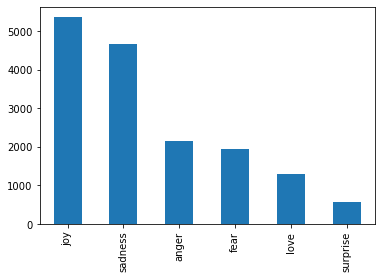

In [8]:
df['Emotion'].value_counts().plot(kind='bar')

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

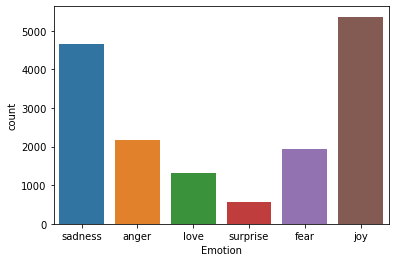

In [9]:
sns.countplot(df['Emotion'])

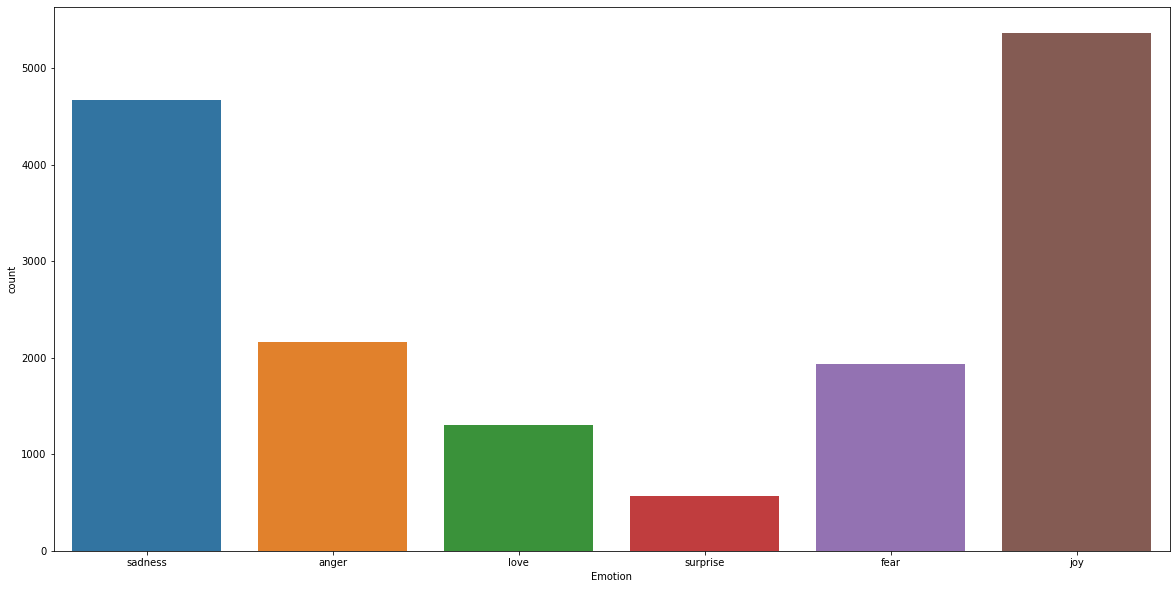

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment =blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else :
        result = 'Neutral'
    return result

In [13]:
get_sentiment("he is good")

'Positive'

In [14]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [15]:
df.head()

,Emotion,Text,Sentiment
0,sadness,i didnt feel humiliated,Neutral
1,sadness,i can go from feeling so hopeless to so damned...,Neutral
2,anger,im grabbing a minute to post i feel greedy wrong,Negative
3,love,i am ever feeling nostalgic about the fireplac...,Negative
4,anger,i am feeling grouchy,Neutral


In [16]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1047
          Neutral       545
          Positive      567
fear      Negative      871
          Neutral       452
          Positive      614
joy       Negative      589
          Neutral       776
          Positive     3997
love      Negative      244
          Neutral       179
          Positive      881
sadness   Negative     2205
          Neutral      1165
          Positive     1296
surprise  Negative      202
          Neutral        99
          Positive      271
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

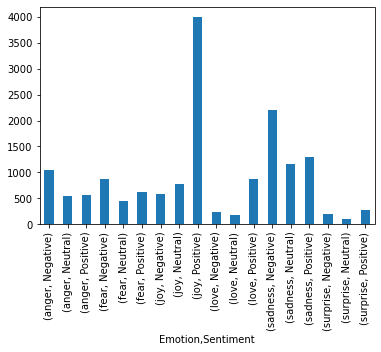

In [17]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [18]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x00000240D24F2310>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


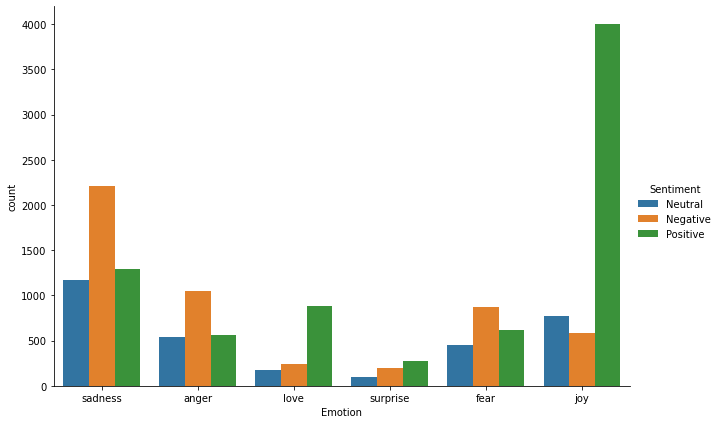

In [19]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


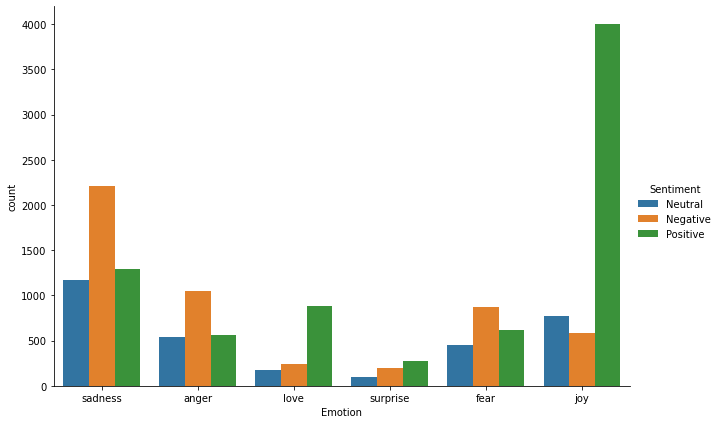

In [20]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

In [21]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [23]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [24]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [25]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
4,i am feeling grouchy,feeling grouchy
...,...,...
15995,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,turning feel pathetic waiting tables subbing t...
15997,i feel strong and good overall,feel strong good overall
15998,i feel like this was such a rude comment and i...,feel like rude comment im glad


In [26]:
from collections import Counter

In [27]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [28]:
emotion_list=df["Emotion"].unique().tolist()

In [29]:
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [30]:
joy_list=df[df['Emotion']=="joy"]['Clean_Text'].tolist()

In [31]:
joy_docx=''.join(joy_list)

In [32]:
joy_docx

'petronas years feel petronas performed huge profitfeel running divine experience expect type spiritual encounterimmense sympathy general point possible proto writer trying find time write corners life sign agent let publishing contract feels little preciousfeel reassured anxietyfeeling amused delightedable help chai lifeline support encouragement great feeling glad able helpfeel superior dead chicken grieving childgiddy feeling elegant perfectly fitted pencil skirtimagine real life scenario emotionally connected feel totally accepted safe morally acceptable close prolonged physical contact sex expected subsequentlysure feel contentfeeling need creativewant know causing feel splendid self step awayneed need need protected feel safe small find season wordsplan share everyday life stories traveling adventures inspirations handmade creations hope feel inspiredchristmas trees got feeling festive sure spurring started bookive worn little concealer days im feeling brave dont want pale perfec

In [33]:
keyword_joy=extract_keywords(joy_docx)

In [34]:
keyword_joy

{'feel': 1777,
 'feeling': 1160,
 'like': 933,
 'im': 387,
 'time': 225,
 'people': 188,
 'little': 186,
 'pretty': 167,
 'going': 156,
 'know': 152,
 'good': 149,
 'life': 137,
 'things': 118,
 'way': 117,
 'want': 115,
 'think': 112,
 'day': 110,
 'happy': 107,
 'love': 107,
 'feels': 103,
 'need': 101,
 'dont': 99,
 'work': 93,
 'sure': 92,
 'makes': 92,
 'feelings': 90,
 'bit': 87,
 'ive': 82,
 'look': 79,
 'better': 76,
 'excited': 75,
 'right': 74,
 'got': 73,
 'help': 72,
 'important': 71,
 'today': 68,
 'new': 68,
 'free': 67,
 'cool': 66,
 'glad': 65,
 'able': 64,
 'year': 64,
 'href': 64,
 'confident': 63,
 'http': 63,
 'making': 61,
 'come': 61,
 'satisfied': 61,
 'find': 60,
 'sweet': 60}

In [35]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} most common keywords".format(emotion_name))
    sns.barplot(x="token",y="count",data=df_01)
    plt.xticks(rotation=45)
    plt.show()

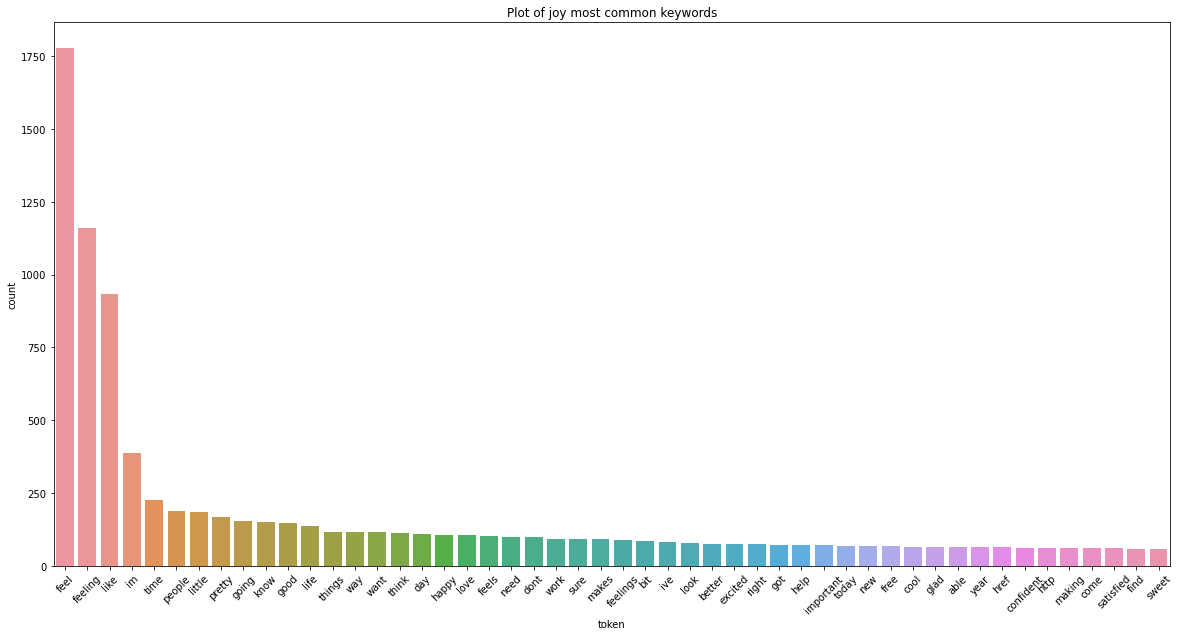

In [36]:
plot_most_common_words(keyword_joy,"joy")

In [37]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

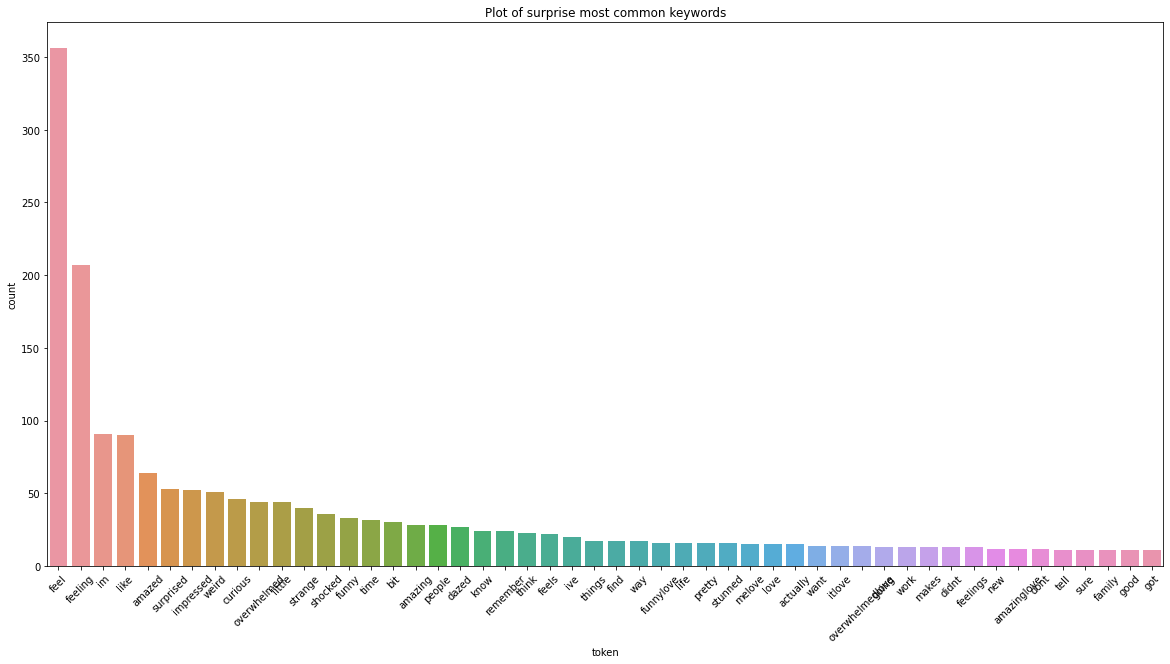

In [38]:
plot_most_common_words(keyword_surprise,"surprise")

In [39]:
from wordcloud import WordCloud

In [40]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

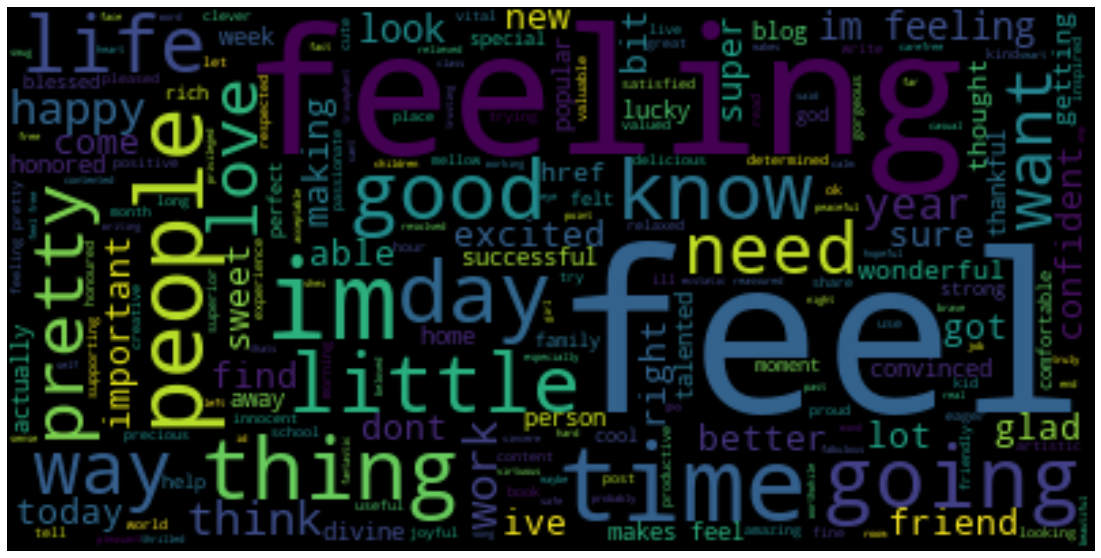

In [41]:
plot_wordcloud(joy_docx)

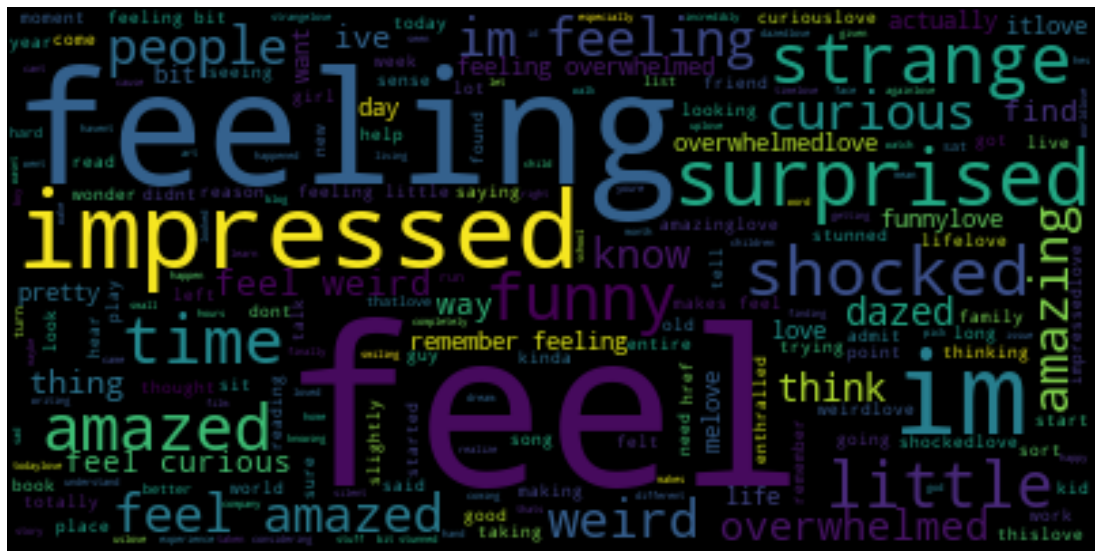

In [42]:
plot_wordcloud(surprise_docx)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [46]:
Xfeatures

0                                    didnt feel humiliated
1              feeling hopeless damned hopeful cares awake
2                im grabbing minute post feel greedy wrong
3                feeling nostalgic fireplace know property
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic waiting tables subbing t...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: Clean_Text, Length: 16000, dtype: object

In [47]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [48]:
cv.get_feature_names()

['aa',
 'aaaaaaand',
 'aaaaand',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abbigail',
 'abc',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abit',
 'able',
 'ableness',
 'abnormally',
 'aboard',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'aboutlove',
 'abraham',
 'abroad',
 'abruptly',
 'absence',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbed',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'abt',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abyss',
 'ac',
 'academia',
 'academic',
 'academics',
 'academylove',
 'acause',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessaries',
 'accessibility',
 'accessories',
 'accessory',
 'accident',
 'accidentally',
 'accidents',
 'acclim

In [49]:
# X.toarray()

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [51]:
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [52]:
nv_model.score(X_test,y_test)

0.7704166666666666

In [53]:
y_pred_for_nv= nv_model.predict(X_test)

In [54]:
y_pred_for_nv

array(['sadness', 'joy', 'sadness', ..., 'fear', 'joy', 'fear'],
      dtype='<U8')

In [55]:
sample_text=['I love Divya so much']

In [56]:
vect=cv.transform(sample_text).toarray()

In [57]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [58]:
nv_model.predict_proba(vect)

array([[0.09190134, 0.06859897, 0.47611255, 0.10239971, 0.25575696,
        0.00523047]])

In [59]:
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [60]:
np.max(nv_model.predict_proba(vect))

0.47611255017364845

In [61]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{},Prediction score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [62]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction score:0.47611255017364845


{'anger': 0.09190134363881594,
 'fear': 0.06859896543345205,
 'joy': 0.47611255017364845,
 'love': 0.10239971458200657,
 'sadness': 0.25575695795519865,
 'surprise': 0.005230468216878127}

In [63]:
predict_emotion(["He hates divya's some habets"],nv_model)

Prediction:sadness,Prediction score:0.3909147544313145


{'anger': 0.13695600573689776,
 'fear': 0.12778703677571915,
 'joy': 0.19846905592165737,
 'love': 0.09390843463193024,
 'sadness': 0.3909147544313145,
 'surprise': 0.05196471250248135}

In [64]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.85      0.62      0.72       607
        fear       0.84      0.58      0.69       566
         joy       0.74      0.95      0.83      1581
        love       0.87      0.28      0.43       434
     sadness       0.76      0.93      0.84      1434
    surprise       0.94      0.19      0.31       178

    accuracy                           0.77      4800
   macro avg       0.83      0.59      0.63      4800
weighted avg       0.79      0.77      0.75      4800



In [65]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 379,   18,   74,    0,  135,    1],
       [  26,  328,   89,    2,  120,    1],
       [  12,    6, 1503,   11,   49,    0],
       [   7,    8,  239,  122,   58,    0],
       [  21,    7,   70,    3, 1333,    0],
       [   3,   23,   61,    2,   56,   33]], dtype=int64)

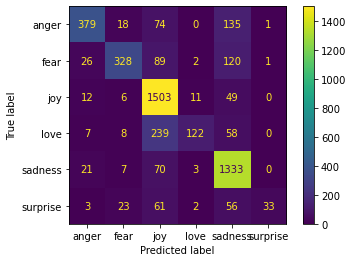

In [66]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [67]:
import joblib

In [68]:
model_file=open("train.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [69]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
lr_model.score(X_test,y_test)

0.88625

In [71]:
predict_emotion(sample_text,lr_model)

Prediction:joy,Prediction score:0.36308647930587706


{'anger': 0.16971129192418233,
 'fear': 0.12365278458435318,
 'joy': 0.36308647930587706,
 'love': 0.08072911264712765,
 'sadness': 0.24411526823771446,
 'surprise': 0.01870506330074541}

In [72]:
import eli5

In [73]:
eli5.show_weights(lr_model,top=20)

In [74]:
class_names=ylabels.unique().tolist()

In [75]:
feature_names=cv.get_feature_names()

In [76]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)